In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("student_exam_scores.csv")
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


In [4]:
df.describe()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


In [6]:
df.isna().sum()

student_id            0
hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64

In [9]:
df.nunique()

student_id            200
hours_studied          96
sleep_hours            50
attendance_percent    167
previous_scores        54
exam_score            139
dtype: int64

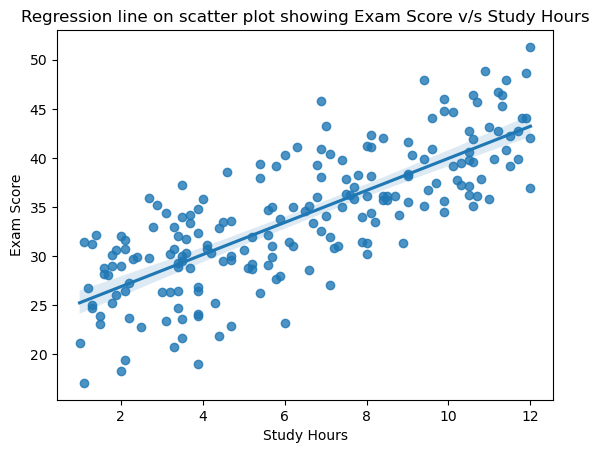

In [48]:
sns.regplot(x="hours_studied", y = "exam_score", data = df)
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Regression line on scatter plot showing Exam Score v/s Study Hours")
plt.show()
# Shows that more hours studied -> more marks.

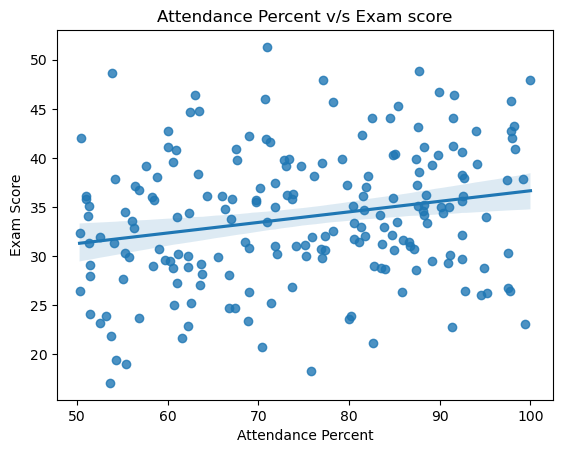

In [45]:
sns.regplot(x="attendance_percent", y="exam_score", data=df)
plt.xlabel("Attendance Percent")
plt.ylabel("Exam Score")
plt.title("Attendance Percent v/s Exam score")
plt.show()
#Nothing concrete from this comparison, seems random

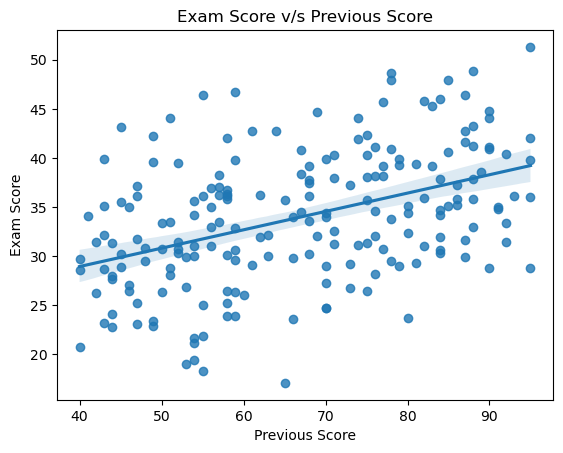

In [57]:
sns.regplot(x = "previous_scores", y = "exam_score", data = df)
plt.xlabel("Previous Score")
plt.ylabel("Exam Score")
plt.title("Exam Score v/s Previous Score")
plt.show()
#Exam score < Previous Score
#Better interpretted on the next graph

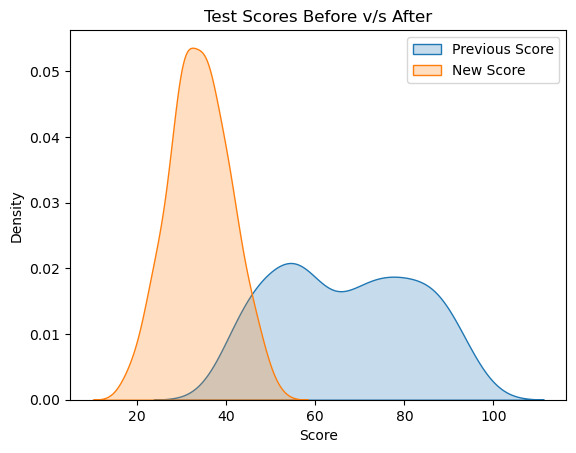

In [56]:
sns.kdeplot(df['previous_scores'], label='Previous Score', fill=True)
sns.kdeplot(df['exam_score'], label='New Score', fill=True)
plt.title("Test Scores Before v/s After")
plt.xlabel("Score")
plt.ylabel("Density")
plt.legend()
plt.show()
#From this plot we can confirm that the test score of the students have drastically degraded

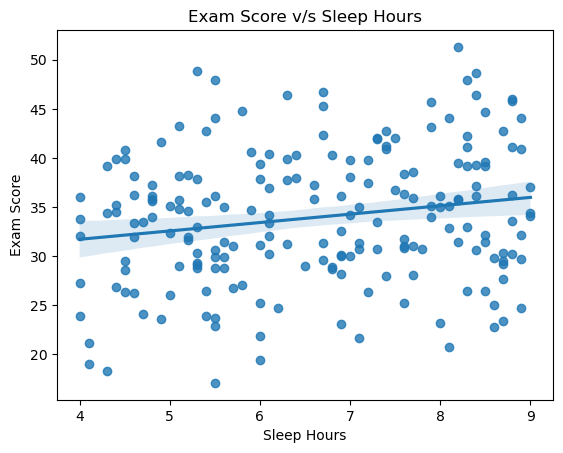

In [60]:
sns.regplot(x = "sleep_hours", y = "exam_score", data = df)
plt.xlabel("Sleep Hours")
plt.ylabel("Exam Score")
plt.title("Exam Score v/s Sleep Hours")
plt.show()
#More Sleep -> More exam score

## Trying to find why the sudden drop in marks of the students

In [64]:
df['score_change'] = df['exam_score'] - df['previous_scores']

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score,score_change
0,S001,8.0,8.8,72.1,45,30.2,-14.8
1,S002,1.3,8.6,60.7,55,25.0,-30.0
2,S003,4.0,8.2,73.7,86,35.8,-50.2
3,S004,3.5,4.8,95.1,66,34.0,-32.0
4,S005,9.1,6.4,89.8,71,40.3,-30.7


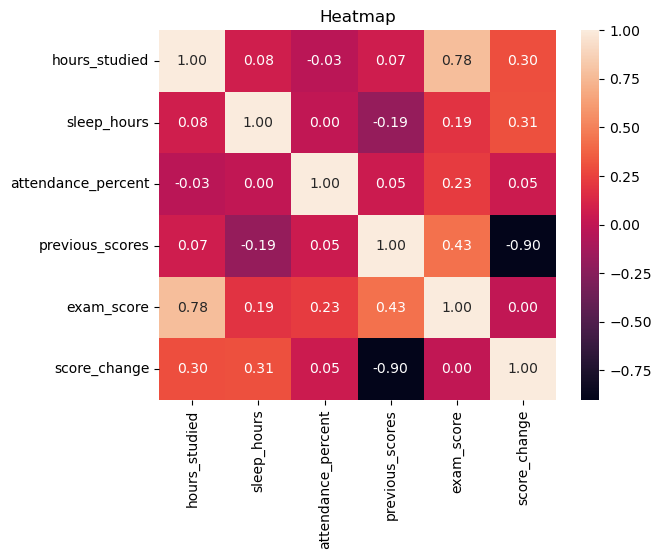

In [66]:
new = df.corr(numeric_only=True)
sns.heatmap(new, annot=True, fmt = '.2f')
plt.title("Heatmap")
plt.show()
#From this heatmap we can conclude that everyone faced a drop in their exam scores(-0.9) but the best way to fight that drop was more study hours(0.78) and more sleep(0.31), attendance didnt matter a ton(0.05)